# Wiadomości wstępne

## Wstęp

W niniejszej pracy zostaną omówione zagadnienia związane z algorytmami wyznaczania **MST**. Wyjaśnione zostanie pojęcie minimalnego drzewa rozpinającego (**MST**), a także opisane będą algorytmy **Kruskala** i **Prima**. Ponadto, omówione zostaną główne różnice między wymienionymi algorytmami, a także przedstawione zostaną metody sprawdzenia poprawności wyników dla każdego z tych algorytmów. W dalszej części pracy omówione zostaną implementacje algorytmów związanych z tymi zagadnieniami: algorytm **Kruskala** i algorytm **Prima**. Po każdej z implementacji przedstawiony zostanie opis implementacji, analiza złożoności oraz przykład zastosowania algorytmu.

## Czym jest minimalne drzewo rozpinające(MST)?

Minimalne drzewo rozpinające(**MST**) jest drzewem, które łączy wszystkie wierzchołki grafu, przy minimalnej sumie wag krawędzi. Jest to podzbiór krawędzi grafu, który tworzy acykliczny graf spójny i pokrywa wszystkie wierzchołki, przy minimalnym koszcie.

Kryteria minimalnego drzewa rozpinającego:
* Minimalne drzewo rozpinające musi być spójne, czyli musi istnieć ścieżka łącząca każde dwa wierzchołki w drzewie.


* Suma wag krawędzi w minimalnym drzewie rozpinającym musi być jak najmniejsza spośród wszystkich możliwych drzew rozpinających graf.


* Graf może mieć więcej niż jedno minimalne drzewo rozpinające, jednak niezależnie od tego suma wag krawędzi będzie zawsze minimalna.

## Na czym polega algorytm Kruskala?

Algorytm **Kruskala** jest algorytmem, który jest wykorzystany do znajdowania minimalnego drzewa rozpinającego(**MST**) w ważonym grafie nieskierowanym. Algorytm ten wybiera kolejne krawędzie o najmniejszych wagach i dodaje je do **MST**, o ile nie powodują utworzenia cyklu. 

Algorytm **Kruskala** zawiera następujące kroki:
* Wszystkie krawędzie grafu są posortowane rosnąco według ich wag.


* Wybrana jest krawędź o najmniejszej wadze.


* Sprawdza się, czy wybrana krawędź łączy dwa różne zbiory wierzchołków. Jeśli tak, wtedy ona zostaje dodana do **MST**. 


* Zbiory wierzchołków związane z wybraną krawędzią zostają połączone.


* Kroki **2-4** są powtarzane dopóki **MST** nie zawiera **V**-1 krawędzi(gdzie **V** to liczba wierzchołków grafu) lub nie zostaną sprawdzone wszystkie krawędzie.

Złożoność czasowa algorytmu **Kruskala** wynosi:
$$\mathcal O(E*log(E))$$
Gdzie **E** to liczba krawędzi w grafie.

## Na czym polega algorytm Prima?

Algorytm **Prima** jest algorytmem, który jest wykorzystany do znajdowania minimalnego drzewa rozpinającego(**MST**) w ważonym grafie nieskierowanym. Algorytm ten zaczyna od jednego wierzchołka i stopniowo dodaje krawędzie do **MST**, tak, aby ostatecznie pokryć wszystkie wierzchołki grafu.

Algorytm **Prima** zawiera następujące kroki:
* Wybrany jest dowolny początkowy wierzchołek.


* Z kolejki priorytetowej zostaje pobrana krawędź o najmniejszej wadze.
  
  
* Jeśli krawędź łączy wierzchołek, który już należy do **MST**, z wierzchołkiem, który jeszcze nie należy, to te krawędzi zostają dodane do **MST**.


* Wybrany wierzchołek jest oznaczony jako odwiedzony.


* Każda krawędź wychodząca z wybranego wierzchołka, która łączy nieodwiedzony wierzchołek, jest dodana do kolejki priorytetowej.


* Kroki **2-5** są powtarzane dopóki **MST** nie zawiera **V**-1 krawędzi(gdzie **V** to liczba wierzchołków grafu) lub nie zostaną sprawdzone wszystkie krawędzie.


Złożoność czasowa algorytmu **Prima** wynosi:
$$\mathcal O(E*log(V))$$
Gdzie **E** to liczba krawędzi, a **V** to liczba wierzchołków w grafie.

## Na czym głównie polega różnica między algorytmem **Prima** a algorytmem **Kruskala**?

Głównie różnica między algorytmem Prima a algorytmem Kruskala polega na sposobie wyboru i łączenia krawędzi:
* Algorytm **Prima** wybiera krawędzie na podstawie ich wag, priorytetyzując najkrótsze krawędzie, które łączą już odwiedzone wierzchołki z nieodwiedzonymi. W tym momencie algorytm **Kruskala**, natomiast, wybiera krawędzie na podstawie ich wag bez uwzględniania połączonych wierzchołków.


* Algorytm **Prima** łączy krawędzie poprzez dodawanie ich do drzewa rozpinającego, podczas gdy algorytm **Kruskala** sprawdza, czy dodana krawędź nie tworzy cyklu w budowanym drzewie rozpinającym(**MST**).


* Algorytm **Prima** generuje minimalne drzewo rozpinające(**MST**) iteracyjnie od jednego wierzchołka, podczas gdy algorytm **Kruskala** sortuje krawędzie i iteracyjnie dodaje je do drzewa rozpinającego(**MST**).

## W jaki sposób można sprawdzić poprawność wyników algorytmu Prima oraz algorytmu Kruskala?

Aby zweryfikować poprawność wyników algorytmów podanych wyżej, można skorzystać z wbudowanej w środowisku **SageMath** bibliotek, które zawiera różne implementacje algorytmów wyznaczania **MST**. Jednak jeśli nie ma dostępnej wbudowanej implementacji, istnieje możliwość sprawdzenia podstawowego warunku konicznego minimalnego drzewa rozpinającego: drzewo rozpinające musi być spójne, czyli wierzchołki są osiągalne od dowolnego innego wierzchołka w drzewie.

# Implementacje algorytmów

## Implementacja algorytmu Kruskala

### Funkcje pomocniczne

Niżej jest podana funkcja, która przyjmuje dwa argumenty: tablica pierwszych wierzchołków **src** oraz indeks wierzchołku **i**. Celem funkcji jest znalezienie początkowego wierzchołku. Funkcja zwraca indeks początkowego wierzchołka.

In [86]:
def getRoot(src: list[int], i: int) -> int:
    if src[i] != i:
        src[i] = getRoot(src, src[i])
    return src[i]

Niżej jest podana funkcja, która przyjmuje cztery argumenty: tablica pierwszych wierzchołków **src**, tablica rankingu **rank**, indeks pierwszego początkowego wierzchołku **x**, oraz indeks drugiego początkowego wierzchołku **y**. Celem funkcji jest łączenie dwóch zbiorów na podstawie podanych rankingów w celu utworzenia większego zbioru.

In [87]:
def combineSubsets(src: list[int], rank: list[int], x: int, y: int) -> None:
    if rank[x] < rank[y]:
        src[x] = y
    elif rank[x] > rank[y]:
        src[y] = x
    else:
        src[y] = x
        rank[x] += 1

Niżej jest podana funkcja, która implementuje algorytm **Kruskala**. Ona przyjmuje dwa argumenty: tablica wierzchołków i wag **src** oraz liczbę wierzchołków **V**. Celem funkcji jest generowanie połączeń zgodnie z podanymi zasadami. Funkcja zwraca dwuwymiarową tablicę, która reprezentuje wygenerowane połączenia.

In [221]:
def kruskal(src: list[list[int]], V: int) -> list[list[int]]:
    result = []
    i = 0
    e = 0
        
    connections = sorted(src[:], key=lambda item: (item[2], item[1]))
    
    parents = []
    ranks = []

    for node in range(V):
        parents.append(node)
        ranks.append(0)
            
    while e < V - 1:
        u, v, w = connections[i]

        i += 1
 
        x = getRoot(parents, u)
        y = getRoot(parents, v)

        if x != y:
            e += 1
            result.append([u, v, w])
            combineSubsets(parents, ranks, x, y)
            
    return result

### Opis implementacji

Najpierw tworzona jest tablica wyjściowa **result**, która będzie przechowywać krawędzie minimalnego drzewa rozpinającego(**MST**). Dalej odbywa się inicjalizacja zmiennych wewnętrznych. Następnie odbywa się sortowanie kopii tablicy wejściowej **src** według podanych wag każdej krawędzi. Posortowana lista nazywa się **connections**. Dalej twoerzone są puste tablice **parents** i **ranks**. Tablica **parents** będzie przechowywać informację o przynależności każdego wierzchołka. Tablica **ranks** będzie przechowywać informację o rankingu drzew dla każdego wierzchołka. Następnie odbywa się iteracja przez podaną liczbę wierzchołków **V** i każdy zostaje dodany do tablicy **parents**, a rankingi są równe **0**. Dalej odbywa się proces generacji **MST**, który będzie trwać, dopóki nie zostanie zbudowane **MST** o **V-1** krawędziach. W każdej iteracji, brana jest krawędź z tablicy **connections** o indeksie **i** i zostaje rozpakowana do zmiennych **u**(pierwszy wierzchołek), **v**(drugi wierzchołek), **w**(waga).
Przy pomocy funkcji **getRoot** znajdowane są reprezentanty zbiorów, do których należą wierzchołki **u** i **v**. Zwracane wartości **x** i **y** są indeksami tych reprezentantów. Jeżeli wartości zmiennych **x** i **y** są różne, oznacza to, że wierzchołki **u** i **v** należą do różnych zbiorów i możemy je połączyć. Następna krawędź jest dodana to tablicy wyjściowej. Wartość zmiennej **e** jest inkrementowana o **1**, ponieważ dodana jest kolejna krawędź do **MST**. Dalej jest wywoływana funkcja **combineSubsets** w celu połączenia zbiorów o indeksach **x** i **y** w jedno większe drzewo.

### Analiza złożoności

Początkowo odbywa się sortowanie krawędzi. Jeśli **src** zawiera **V** wierzchołków i **E** krawędzi, to złożoność czasowa sortowania wynosi:
$$\mathcal O(E*log(E))$$
Kolejna operacja, która polega na inicjalizacji zmiennych wewnętrznych, ma złożoność czasową:
$$\mathcal O(V)$$

Dalej w pętli, która wykonuje się maksymalnie **V-1** razy, odbywają się następujące operacje:
* Pobranie początkowego wierzchołka dla podanej krawędzi


* Dodawanie krawędzi do tablicy wyjściowej, jeśli określone warunki są spełnione


* Łączenie dwóch zbiorów na podstawie podanych rankingów w celu utworzenia większego zbioru

Z tego powodu złożoność czasowa powyższych operacji wynosi:

$$\mathcal O(E*V)$$

Gdzie **E** to liczba krawędzi. Ostatecznie złożoność czasowa algorytmu **Kruskala** zależy od operacji pobrania początkowego wierzchołka dla podanej krawędzi. Dlatego złożoność czasowa algorytmu **Kruskala** wynosi:
$$\mathcal O(E*V)$$

### Przykłady wykorzystania

Poniżej jest podany przykład wykorzystania, który ...

In [225]:
src = [[0, 1, 10],
    [0, 5, 6],
    [0, 3, 5],
    [1, 3, 15],
    [2, 3, 4],
    [0, 2, 5],
    [0, 4, 2],
    [3, 6, 7],
    [2, 7, 4],
    [4, 6, 8],
    [6, 7, 3],
    [5, 7, 8]]
result = kruskal(src, 8)

print(result)

[[0, 4, 2], [6, 7, 3], [2, 3, 4], [2, 7, 4], [0, 2, 5], [0, 5, 6], [0, 1, 10]]


#### Sprawdzenie poprawności wyniku algorytmu Kruskala

Sprawdzenie poprawności odbywa się przy pomocy wbudowanej w środowisko **SageMath** biblioteki, która zawiera implementację algorytmu **Kruskala**.

In [226]:
from sage.graphs.spanning_tree import filter_kruskal

validation_src = []

for c in src:
    validation_src.append(tuple(c))
g = Graph()
g.add_edges(validation_src)

valid_result = filter_kruskal(g, check=True)
for v in result:
    found = False
    for q in valid_result:
        if v[0] == q[0] and v[1] == q[1] and v[2] == q[2]:
            found = True
    assert found == True

#### Początkowa reprezentacja geometryczna

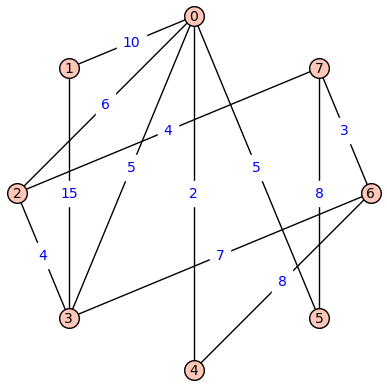

In [311]:
from sage.graphs.graph_plot import GraphPlot

graph_src = []
labels_src = {}

for c in src:
    graph_src.append(tuple(c))

g = Graph()
g.add_edges(graph_src)

GP = g.graphplot(edge_labels=True, layout='circular')
GP.show()

#### Ostateczna reprezentacja geometryczna

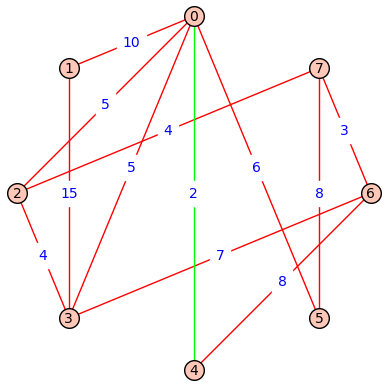

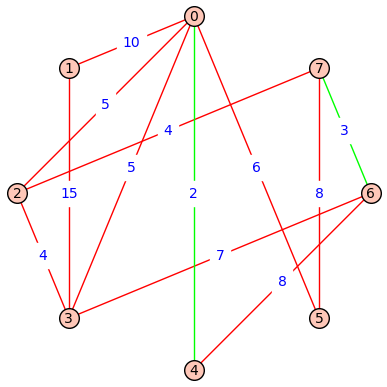

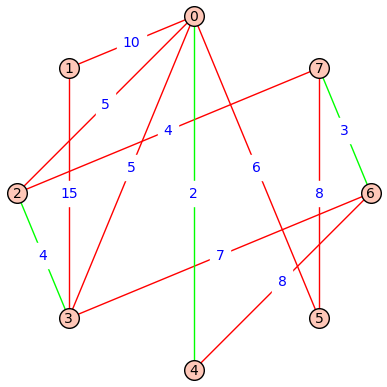

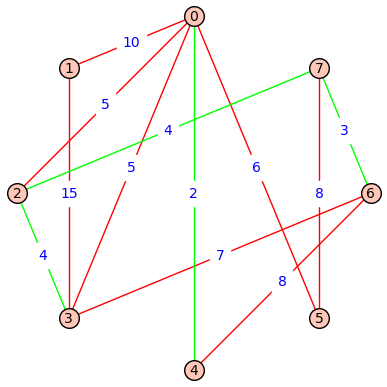

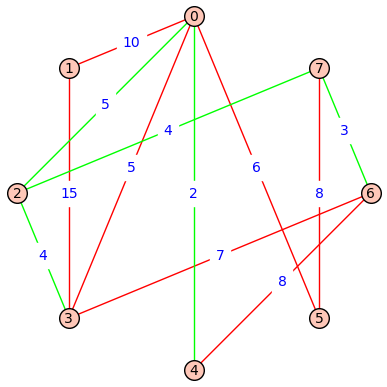

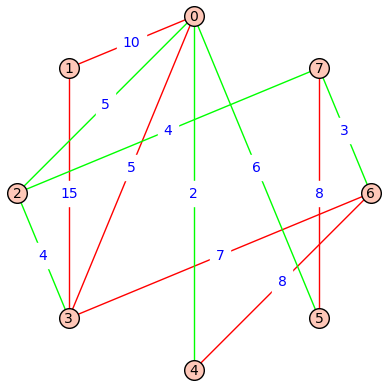

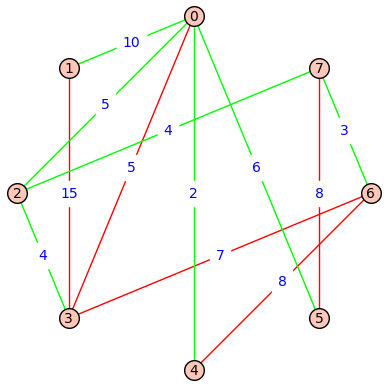

In [280]:
import copy

graph_src = []
labels_src = {}
edge_colors = {'#FF0000': [], '#00FF00': []}

for c in result:
    edge_colors['#00FF00'].append(tuple(c))
    
for c in src:
    graph_src.append(tuple(c))
    
    if tuple(c) not in edge_colors['#00FF00']:
        edge_colors['#FF0000'].append(tuple(c))

options['edge_colors'] = edge_colors

scale = 1
for v in range(len(edge_colors['#00FF00'])):
    edge_colors_temp = copy.deepcopy(edge_colors)
    
    for v in edge_colors_temp['#00FF00'][scale:]:
        edge_colors_temp['#FF0000'].append(v)
    edge_colors_temp['#00FF00'] = edge_colors_temp['#00FF00'][:scale]

    GP = g.graphplot(edge_labels=True, layout='circular', edge_colors=edge_colors_temp)
    GP.show()
    
    scale += 1

## Implementacja algorytmu Prima

Niżej jest podana funkcja, która implementuje algorytm **Prima**. Ona przyjmuje dwa argumenty: tablica wierzchołków i wag **src** oraz liczbę wierzchołków **V**. Celem funkcji jest generowanie połączeń zgodnie z podanymi zasadami. Funkcja zwraca dwuwymiarową tablicę, która reprezentuje wygenerowane połączenia.

In [287]:
def prim(src: list[list[int]], V: int) -> list[list[int]]:
    result = []

    G = [[0] * V for _ in range(V)]

    for c in src:
        G[c[0]][c[1]] = c[2]
        G[c[1]][c[0]] = c[2]

    selected = [False] * V
    selected[0] = True

    q = 0
    while q < V - 1:
        minimum = float('inf')
        x = 0
        y = 0
        for i in range(V):
            if selected[i]:
                for j in range(V):
                    if not selected[j] and G[i][j]:
                        if minimum > G[i][j]:
                            minimum = G[i][j]
                            x = i
                            y = j
        result.append([x, y, G[x][y]])
        selected[y] = True
        q += 1
    return result

### Opis implementacji

Najpierw tworzona jest tablica wyjściowa **result**, która będzie przechowywać krawędzie minimalnego drzewa rozpinającego(**MST**). Następnie tworzona jest macierz sąsiedztwa **G**, wypełniona zerami, o rozmiarze:
$$\mathcal V^2$$ 
Gdzie **V** to podany argument, który reprezentuje liczbę wierzchołków. Następnie dla każdej krawędzi, w podanej tablice wejściowej **src**, wartość w macierzy **G** odpowiadająca odpowiednim wierzchołkom jest ustawiana na wagę tej krawędzi. Macierz **G** jest symetryczna, ponieważ graf jest nieskierowany. Dalej odbywa się inicjalizacja zmiennych wewnętrznych. Tworzona jest tablica **selected**, która przechowuje informację o tym, które wierzchołki zostały już wybrane. Na początku wszystkie wartości w **selected** są ustawione na **False**, a wierzchołek o indeksie **0** jest ustawiony na **True**, oznaczając, że został wybrany jako pierwszy wierzchołek **MST**. Następnie, odbywa się iteracja , która wykonuje się dopóki nie zostanie wybrane **V-1** krawędzi. Głównym celem tej operacji jest znajdowanie krawędzi o najmniejszej wadze. Dalej odbywa się iteracja przez wszystkie wybrane wierzchołki, oznaczone jako **selected[i] == True** i sprawdza się ich sąsiadów, którzy nie zostały jeszcze wybrani, czyli **selected[j] == False** i mają istniejącą krawędź między nimi, czyli jeżeli wartość w macierzy **G[i][j]** jest większa niż **0**. Jeśli waga tej krawędzi jest mniejsza od dotychczasowej minimalnej wagi **minimum**, wartość tej zmiennej się aktualizuje oraz zapamiętuje się indeksy wierzchołków tej krawędzi **x** i **y**. Po znalezieniu krawędzi o najmniejszej wadze, ona zostaje dodana do tablicy wyjściowej **result**. Następnie wybrany wierzchołek **y** jest oznaczony jako **True** w tablice **selected**, co oznacza, że jest włączony do **MST**. Po zakończeniu głównej iteracji zwraca się tablica **result**, która zawiera minimalne drzewo rozpinające(**MST**).

### Analiza złożoności

Początkowo odbywa się tworzenie macierzy sąsiedztwa, które polega na utworzeniu macierzy dwuwymiarowej **G** na podstawie podanej tablicy połączeń **src**. Złożoność czasowa tej operacji wynosi:
$$\mathcal O(V)$$
Gdzie **V** to podana liczba wierzchołków.
Dalej, po inicjalizacji zmiennych(złożoność czasowa jest stała), odbywa się znajdowanie najmniejszej krawędzi. Ten proces polega na iteracji przez wszystkie wierzchołki i ich sąsiadujące wierzchołki w celu znalezienia najmniejszej krawędzi. Złożoność czasowa tej operacji wynosi:
$$\mathcal O(V^2)$$
Ostatecznie złożoność czasowa algorytmu **Prima** wynosi:
$$\mathcal O(V^2)$$

### Przykłady wykorzystania

In [304]:
src = [[0, 1, 10],
    [0, 2, 6],
    [0, 3, 5],
    [1, 3, 15],
    [3, 2, 4],
    [0, 5, 5],
    [0, 4, 2],
    [3, 6, 7],
    [2, 7, 4],
    [4, 6, 8],
    [7, 6, 3],
    [7, 5, 8]]
result = prim(src, 8)

print(result)

[[0, 4, 2], [0, 3, 5], [3, 2, 4], [2, 7, 4], [7, 6, 3], [0, 5, 5], [0, 1, 10]]


#### Sprawdzenie poprawności wyniku algorytmu Prima

Ze względu na brak wbudowanej implementacji algorytmu **Prima** w środowisku **SageMath**, sprawdzenie poprawności wyniku podanej wyżej implementacji będzie polegać na sprawdzeniu spójności wygenerowanego minimalnego drzewa rozpinającego(**MST**)

In [310]:
from collections import deque

graph_src_vertices = {}

for v in src:
    if not graph_src_vertices.get(v[0]):
        graph_src_vertices[v[0]] = [v[1]]
        
    else:
        graph_src_vertices[v[0]] += [v[1]]
        
    if not graph_src_vertices.get(v[1]):
        graph_src_vertices[v[1]] = [v[0]]
        
    else:
        graph_src_vertices[v[1]] += [v[0]]

graph_src_visited = set()
graph_src_queue = deque([list(graph_src_vertices.keys())[0]])
while graph_src_queue:
    current_vertex = graph_src_queue.popleft()
    graph_src_visited.add(current_vertex)
    
    for c in graph_src_vertices[current_vertex]:
        if c not in graph_src_visited:
            graph_src_queue.append(c)
        
graph_result_vertices = {}
for v in result:
    if not graph_result_vertices.get(v[0]):
        graph_result_vertices[v[0]] = [v[1]]
        
    else:
        graph_result_vertices[v[0]] += [v[1]]
        
    if not graph_result_vertices.get(v[1]):
        graph_result_vertices[v[1]] = [v[0]]
        
    else:
        graph_result_vertices[v[1]] += [v[0]]
    
graph_result_visited = set()
graph_result_queue = deque([list(graph_result_vertices.keys())[0]])
while graph_result_queue:
    current_vertex = graph_result_queue.popleft()
    graph_result_visited.add(current_vertex)
    
    for c in graph_result_vertices[current_vertex]:
        if c not in graph_result_visited:
            graph_result_queue.append(c)
            
assert len(graph_src_visited) == len(graph_result_visited)

#### Początkowa reprezentacja geometryczna

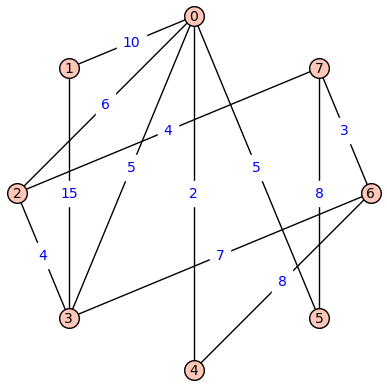

In [296]:
graph_src = []
labels_src = {}

for c in src:
    graph_src.append(tuple(c))

g = Graph()
g.add_edges(graph_src)

GP = g.graphplot(edge_labels=True, layout='circular')
GP.show()

#### Ostateczna reprezentacja geometryczna

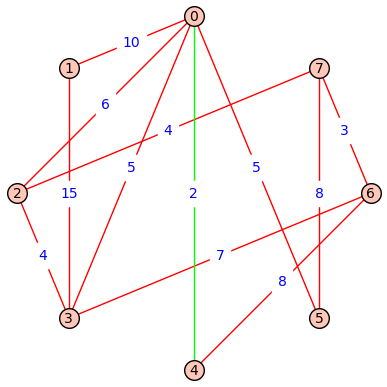

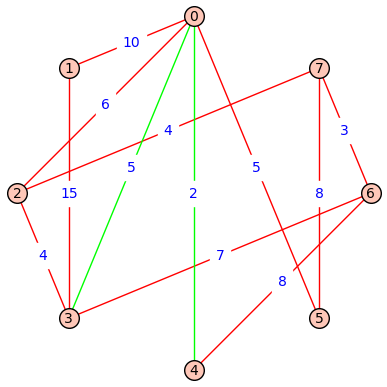

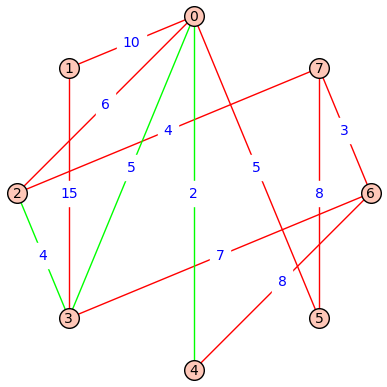

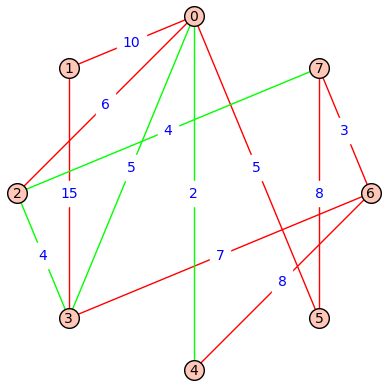

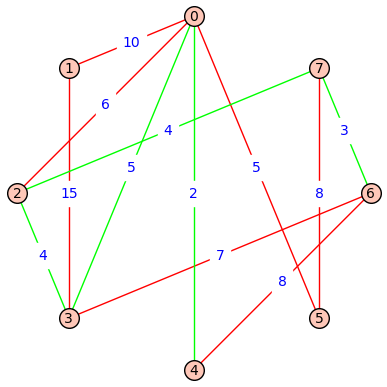

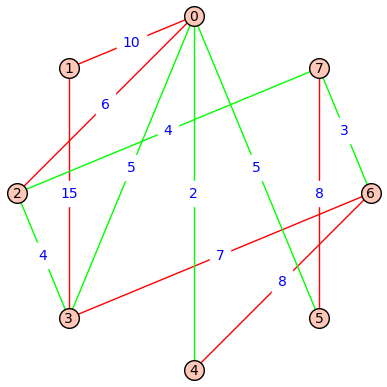

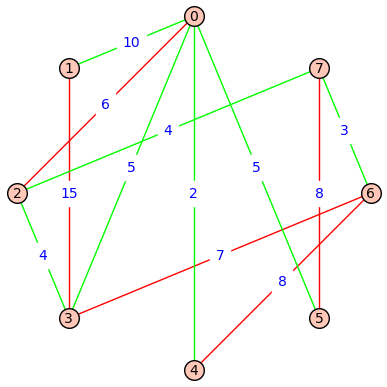

In [297]:
graph_src = []
labels_src = {}
edge_colors = {'#FF0000': [], '#00FF00': []}

for c in result:
    edge_colors['#00FF00'].append(tuple(c))
    
for c in src:
    graph_src.append(tuple(c))
    
    if tuple(c) not in edge_colors['#00FF00']:
        edge_colors['#FF0000'].append(tuple(c))

options['edge_colors'] = edge_colors

scale = 1
for v in range(len(edge_colors['#00FF00'])):
    edge_colors_temp = copy.deepcopy(edge_colors)
    
    for v in edge_colors_temp['#00FF00'][scale:]:
        edge_colors_temp['#FF0000'].append(v)
    edge_colors_temp['#00FF00'] = edge_colors_temp['#00FF00'][:scale]

    GP = g.graphplot(edge_labels=True, layout='circular', edge_colors=edge_colors_temp)
    GP.show()
    
    scale += 1

# Podsumowanie

W niniejszej pracy zostaną omówione zagadnienia związane z algorytmami wyznaczania **MST**. Wyjaśnione zostanie pojęcie minimalnego drzewa rozpinającego (**MST**), a także opisane będą algorytmy **Kruskala** i **Prima**. Dodatkowo, przedstawione będą sposoby sprawdzenia poprawności otrzymanych wyników dla każdego z powyższych algorytmów. W dalszej części pracy omówione zostaną implementacje algorytmów związanych z tymi zagadnieniami: algorytm **Kruskala** i algorytm **Prima**. Po każdej z implementacji przedstawiony zostanie opis implementacji, analiza złożoności oraz przykład zastosowania algorytmu. Na podstawie przeanalizowanej złożoności czasowej, można stwierdzić, że wydajność przedstawionych algorytmów głównie zależy od struktury podanego grafu. W taki sposób algorytm **Prima** jest bardziej wydajny dla grafów, gdzie liczba krawędzi jest zbliżona do liczby wierzchołków kwadratowej. Natychmiast algorytm **Kruskala** jest bardziej wydajny w przypadku grafów, gdzie liczba krawędzi jest znacznie mniejsza od liczby wierzchołków kwadratowej. Warto podkreślić, że, chociaż zarówno algorytm **Kruskala** jak i algorytm **Prima** zwracają poprawne minimalne drzewo rozpinające(**MST**), kolejność krawędzi może się różnić.

# Wykorzystane źródła

- https://en.wikipedia.org/wiki/Kruskal%27s_algorithm
- https://pl.wikipedia.org/wiki/Algorytm_Prima
- https://eduinf.waw.pl/inf/alg/001_search/0141.php